In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [8]:
fantasy_file = Path("Resources/fantasy_merged_7_17.csv")
fantasy_adp_file = Path("Resources/adp_merged_7_17.csv")

In [9]:
fantasy_stats = pd.read_csv(fantasy_file)
fantasy_adp = pd.read_csv(fantasy_adp_file)
fantasy_merged = pd.merge(fantasy_stats, fantasy_adp, how="left", on=["PlayerID"])
fantasy_merged_clean = fantasy_merged.fillna(0)
fantasy_stats_clean = fantasy_stats.fillna(0)

### 1) Which Season had the most fantasy total points?

In [10]:
fantasy_stats_total = fantasy_stats_clean.groupby(by= "Year").sum()["PPR"]

C:\Users\sshoj\AppData\Local\Temp\ipykernel_44316\2728046898.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fantasy_stats_total = fantasy_stats_clean.groupby(by= "Year").sum()["PPR"]


In [11]:
fantasy_stats_total

Year
2017    42014.4
2018    45322.4
2019    44588.2
2020    46971.9
2021    47279.0
2022    45221.7
Name: PPR, dtype: float64

In [12]:
year_list =list(fantasy_stats_total.index)

In [13]:
fantasy_stats_total = pd.DataFrame({
    "Year": year_list,
    "Fantasy Stats Total": list(fantasy_stats_total)
})
fantasy_stats_total

,Year,Fantasy Stats Total
0,2017,42014.4
1,2018,45322.4
2,2019,44588.2
3,2020,46971.9
4,2021,47279.0
5,2022,45221.7


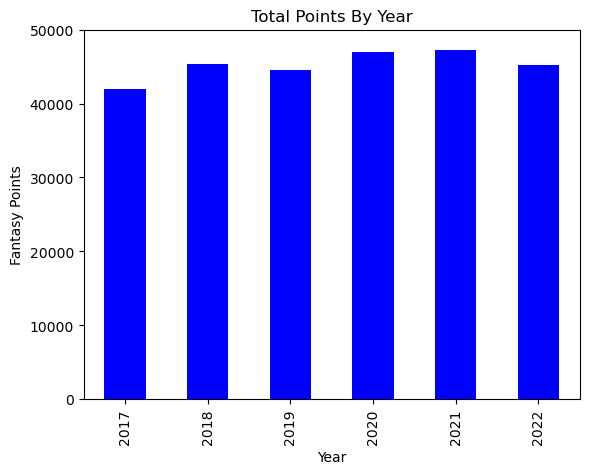

In [14]:
fantasy_total_plot1 = fantasy_stats_total.plot(kind = "bar", x= "Year", y="Fantasy Stats Total", color="blue", ylim = (0, 50000), 
                         ylabel = "Fantasy Points", title = "Total Points By Year")
fantasy_total_plot1.get_legend().remove()

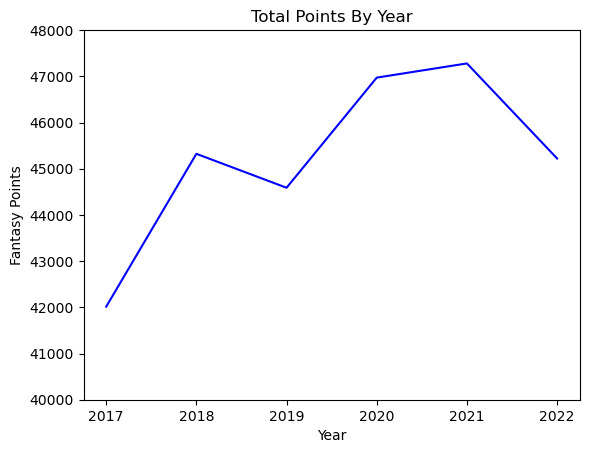

In [15]:
fantasy_total_plot1 = fantasy_stats_total.plot(kind = "line", x= "Year", y="Fantasy Stats Total", color="blue", ylim = (40000, 48000), 
                         ylabel = "Fantasy Points", title = "Total Points By Year")
fantasy_total_plot1.get_legend().remove()